任务:基于transfer_data.csv数据，建立mlp模型，再实现模型迁移学习:
1.实现x对y的预测，可视化结果
2.基于新数据transfer_data2.csv，对前模型进行二次训练，对比模型训练次数少的情况下的表现
备注:模型结构：lp，两个隐藏层，每层50个神经元，激活函数relu，输出层激活函数Linear，选代次数：100次

In [ ]:
# load the data
import pandas as pd
import numpy as np
data = pd.read_csv('transfer_data.csv')

In [ ]:
# define X and y
X = data.loc[:,'x']
y = data.loc[:,'y']
X.head()

In [5]:
#生成二次函数的点
import numpy as np
import matplotlib.pyplot as plt

# make up data建立数据
np.random.seed(1)
x_data = np.linspace(start=-5, stop=5, num=100)[:, np.newaxis]  #水平轴-7~10
#print(x_data)
#np.random.shuffle(x_data)
# noise = np.random.normal(0, 0.1, x_data.shape)
# y_data = np.square(x_data) + noise
y_data = np.square(x_data)
print(y_data.shape)

X = x_data
y = y_data

(100, 1)


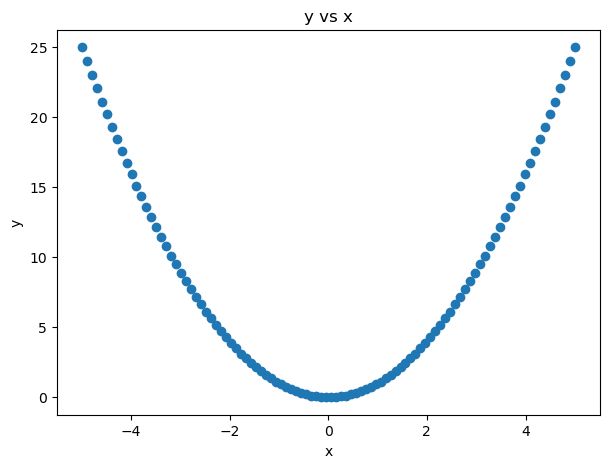

In [6]:
# visualize the data
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(7,5))
plt.scatter(X,y)
plt.title('y vs x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
X = np.array(X).reshape(-1,1)
print(X.shape,y.shape)

In [12]:
from keras.models import Sequential
from keras.layers import Dense
model1 = Sequential()
model1.add(Dense(units=50, activation='relu', input_dim=1))
model1.add(Dense(units=50, activation='relu'))
model1.add(Dense(units=1, activation='linear'))
model1.compile(optimizer='adam', loss='mean_squared_error')
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                100       
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2701 (10.55 KB)
Trainable params: 2701 (10.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# train tne model
model1.fit(X,y,epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3392
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3438
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3436
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3303
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3235
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 0.3286
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3203
Epoch 8/100
4/4 [==============================] - 0s 997us/step - loss: 0.3067
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3188
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3200
Epoch 11/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3211
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3077
Epoch 13/100
4/4 [==============================] - 0s 1ms/

In [27]:
# make prediction
y_predict = model1.predict(X)

4/4 [==============================] - 0s 997us/step


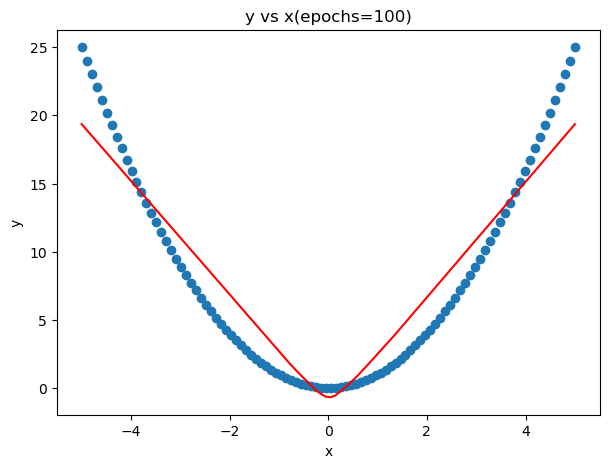

In [16]:
fig2 = plt.figure(figsize=(7,5))
plt.scatter(X,y)
plt.plot(X,y_predict,'r') # 绘制曲线图，其中 X 是输入数据的横坐标，y_predict 是模型对应的输出数据的纵坐标，'r' 表示线条颜色为红色。
plt.title('y vs x(epochs=100)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

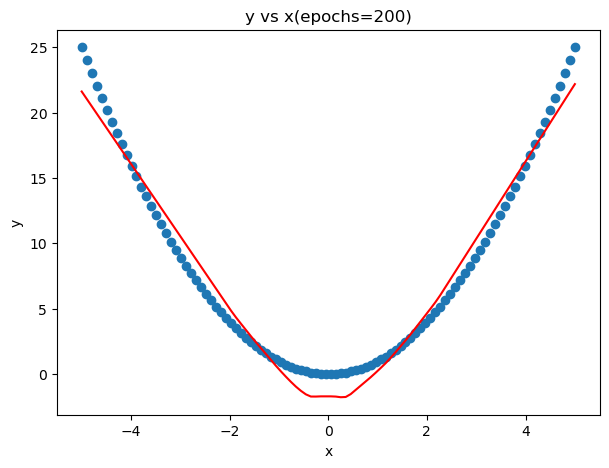

In [19]:
fig3 = plt.figure(figsize=(7,5))
plt.scatter(X,y)
plt.plot(X,y_predict,'r')
plt.title('y vs x(epochs=200)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

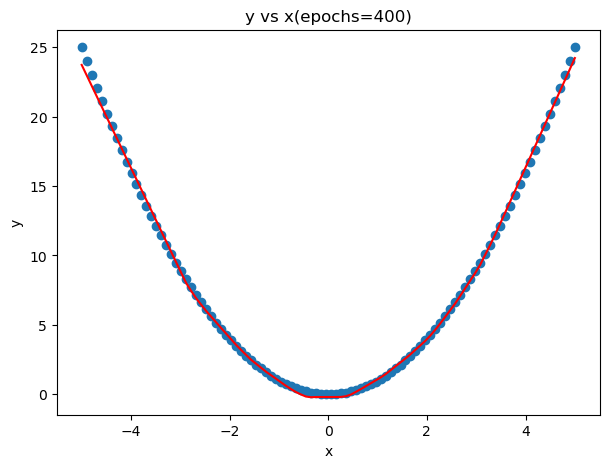

In [28]:
fig4 = plt.figure(figsize=(7,5))
plt.scatter(X,y)
plt.plot(X,y_predict,'r')
plt.title('y vs x(epochs=400)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [88]:
# 保存模型
# from sklearn.externals import joblib
import joblib
joblib.dump(model1,'model.m') # 網上搜了都是pkl後綴，但是好像這個名字隨便起，什麽後綴都可以

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 13: invalid start byte

In [89]:
#加载模型
import joblib
model2 = joblib.load('model.m')

EOFError: 

In [71]:
# data2 = pd.read_csv('transfer_data2.csv')
# data2.head()

#加载新数据
#生成二次函数点
np.random.seed(1)
x_data2 = np.linspace(-6, 6, 120)[:, np.newaxis]+[2]  #水平轴 + 偏移
y_data2 = np.square(x_data2) - 10
print(y_data2)

[[ 6.00000000e+00]
 [ 5.20344608e+00]
 [ 4.42722972e+00]
 [ 3.67135089e+00]
 [ 2.93580962e+00]
 [ 2.22060589e+00]
 [ 1.52573971e+00]
 [ 8.51211073e-01]
 [ 1.97019984e-01]
 [-4.36833557e-01]
 [-1.05034955e+00]
 [-1.64352800e+00]
 [-2.21636890e+00]
 [-2.76887225e+00]
 [-3.30103806e+00]
 [-3.81286632e+00]
 [-4.30435704e+00]
 [-4.77551020e+00]
 [-5.22632582e+00]
 [-5.65680390e+00]
 [-6.06694442e+00]
 [-6.45674740e+00]
 [-6.82621284e+00]
 [-7.17534072e+00]
 [-7.50413106e+00]
 [-7.81258386e+00]
 [-8.10069910e+00]
 [-8.36847680e+00]
 [-8.61591696e+00]
 [-8.84301956e+00]
 [-9.04978462e+00]
 [-9.23621213e+00]
 [-9.40230210e+00]
 [-9.54805452e+00]
 [-9.67346939e+00]
 [-9.77854671e+00]
 [-9.86328649e+00]
 [-9.92768872e+00]
 [-9.97175341e+00]
 [-9.99548055e+00]
 [-9.99887014e+00]
 [-9.98192218e+00]
 [-9.94463668e+00]
 [-9.88701363e+00]
 [-9.80905303e+00]
 [-9.71075489e+00]
 [-9.59211920e+00]
 [-9.45314596e+00]
 [-9.29383518e+00]
 [-9.11418685e+00]
 [-8.91420097e+00]
 [-8.69387755e+00]
 [-8.4532165

In [72]:
# define X2 and y2
# X2 = data.loc[:,'x2']
# y2 = data.loc[;,'y2']

# define X2 and y2
X2 = x_data2
y2 = y_data2
print(X2.shape,y2.shape)

(120, 1) (120, 1)


In [73]:
X2 = np.array(X2).reshape(-1,1)
print(X2.shape,y2.shape)

(120, 1) (120, 1)


In [74]:
# make prediction
y2_predict = model2.predict(X2)

4/4 [==============================] - 0s 1ms/step


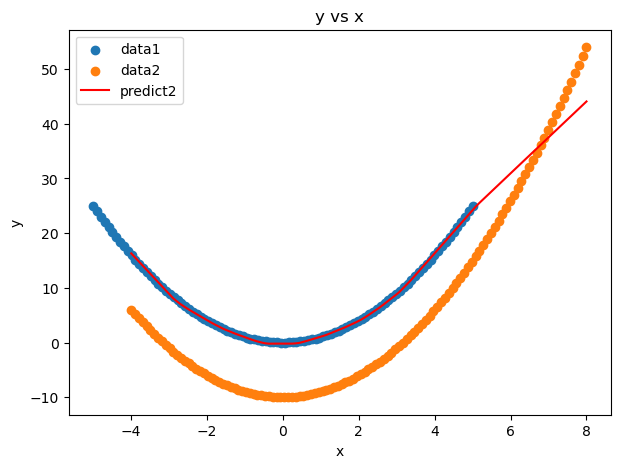

In [76]:
fig5 = plt.figure(figsize=(7,5))
plt.scatter(X,y,label='data1')
plt.scatter(X2,y2,label='data2')
plt.plot(X2,y2_predict,'r',label='predict2')
plt.title('y vs x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [84]:
# transfer train
model2.fit(X2,y2,epochs=10) # 迭代較少次數

Epoch 1/10
4/4 [==============================] - 0s 1ms/step - loss: 3.9824
Epoch 2/10
4/4 [==============================] - 0s 1ms/step - loss: 3.7538
Epoch 3/10
4/4 [==============================] - 0s 1ms/step - loss: 3.4590
Epoch 4/10
4/4 [==============================] - 0s 997us/step - loss: 2.9322
Epoch 5/10
4/4 [==============================] - 0s 1ms/step - loss: 2.8364
Epoch 6/10
4/4 [==============================] - 0s 996us/step - loss: 2.5168
Epoch 7/10
4/4 [==============================] - 0s 2ms/step - loss: 2.2610
Epoch 8/10
4/4 [==============================] - 0s 1ms/step - loss: 2.1014
Epoch 9/10
4/4 [==============================] - 0s 2ms/step - loss: 2.1592
Epoch 10/10
4/4 [==============================] - 0s 1ms/step - loss: 1.6439


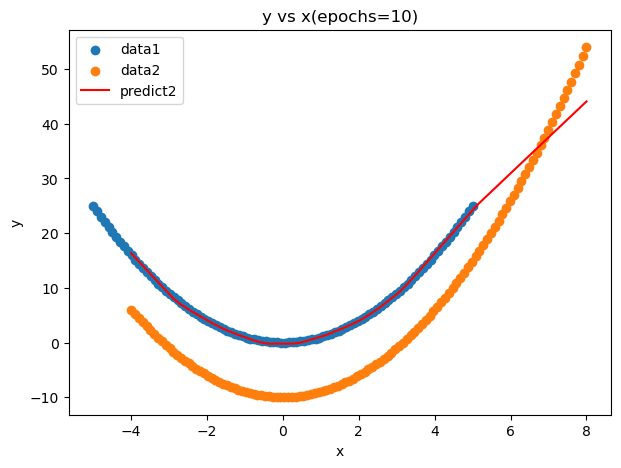

In [79]:
fig6 = plt.figure(figsize=(7,5))
plt.scatter(X,y,label='data1')
plt.scatter(X2,y2,label='data2')
plt.plot(X2,y2_predict,'r',label='predict2')
plt.title('y vs x(epochs=10)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

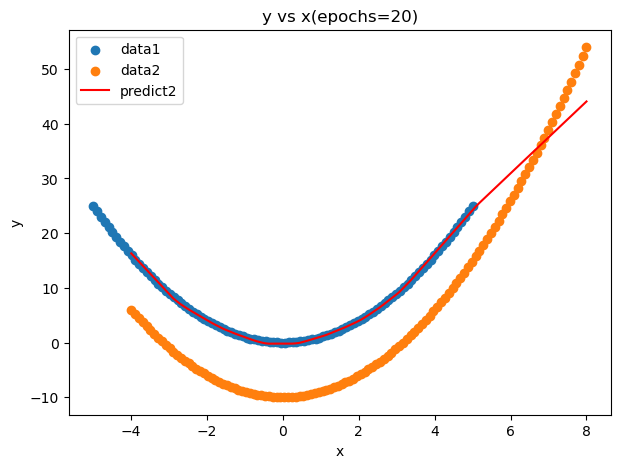

In [82]:
fig7 = plt.figure(figsize=(7,5))
plt.scatter(X,y,label='data1')
plt.scatter(X2,y2,label='data2')
plt.plot(X2,y2_predict,'r',label='predict2')
plt.title('y vs x(epochs=20)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

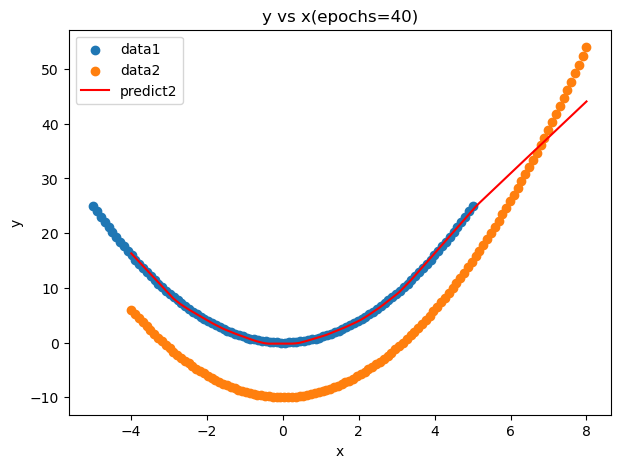

In [85]:
fig8 = plt.figure(figsize=(7,5))
plt.scatter(X,y,label='data1')
plt.scatter(X2,y2,label='data2')
plt.plot(X2,y2_predict,'r',label='predict2')
plt.title('y vs x(epochs=40)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

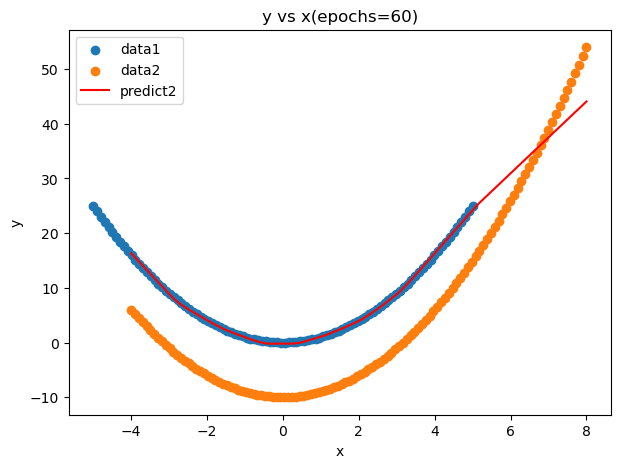

In [86]:
fig9 = plt.figure(figsize=(7,5))
plt.scatter(X,y,label='data1')
plt.scatter(X2,y2,label='data2')
plt.plot(X2,y2_predict,'r',label='predict2')
plt.title('y vs x(epochs=60)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**基于新数据的迁移学习实战summary:**
1.通过使用新数据，实现了模型的2次训练，达到了较好的预测效果
2.建立mlp模型实现了非线性分布数据的回归预测
3.掌握了模型存储与加载的方法
4.通过迁移学习，可减少模型训练迭代次数，大幅缩短训练时间